In [618]:
import pandas as pd 
import numpy as np

In [619]:
csv = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",header=None)

In [620]:
csv.columns=["Age",'Gender','Tb_Bilirubin','DB_Bilirubin','Alkaline_Phosphotase','Sgpt ','Sgot','Protiens','Albumin','Albumin_Globulin','Disease']

#Missing Values
csv.info()
csv.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   583 non-null    int64  
 1   Gender                583 non-null    object 
 2   Tb_Bilirubin          583 non-null    float64
 3   DB_Bilirubin          583 non-null    float64
 4   Alkaline_Phosphotase  583 non-null    int64  
 5   Sgpt                  583 non-null    int64  
 6   Sgot                  583 non-null    int64  
 7   Protiens              583 non-null    float64
 8   Albumin               583 non-null    float64
 9   Albumin_Globulin      579 non-null    float64
 10  Disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Age                     0
Gender                  0
Tb_Bilirubin            0
DB_Bilirubin            0
Alkaline_Phosphotase    0
Sgpt                    0
Sgot                    0
Protiens                0
Albumin                 0
Albumin_Globulin        4
Disease                 0
dtype: int64

In [621]:
csv['Albumin_Globulin'] = csv['Albumin_Globulin'].fillna(csv['Albumin_Globulin'].mean())
csv.info()
csv.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   583 non-null    int64  
 1   Gender                583 non-null    object 
 2   Tb_Bilirubin          583 non-null    float64
 3   DB_Bilirubin          583 non-null    float64
 4   Alkaline_Phosphotase  583 non-null    int64  
 5   Sgpt                  583 non-null    int64  
 6   Sgot                  583 non-null    int64  
 7   Protiens              583 non-null    float64
 8   Albumin               583 non-null    float64
 9   Albumin_Globulin      583 non-null    float64
 10  Disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Age                     0
Gender                  0
Tb_Bilirubin            0
DB_Bilirubin            0
Alkaline_Phosphotase    0
Sgpt                    0
Sgot                    0
Protiens                0
Albumin                 0
Albumin_Globulin        0
Disease                 0
dtype: int64

In [622]:
#replace Gender female with 1 and Male with 0
for i in csv['Gender']:
    if i=='Female':
        csv = csv.replace('Female',1)
    else:
        csv =csv.replace('Male',0)
        

In [623]:
csv


,Age,Gender,Tb_Bilirubin,DB_Bilirubin,Alkaline_Phosphotase,Sgpt,Sgot,Protiens,Albumin,Albumin_Globulin,Disease
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45c6182040>,
      dtype=object)

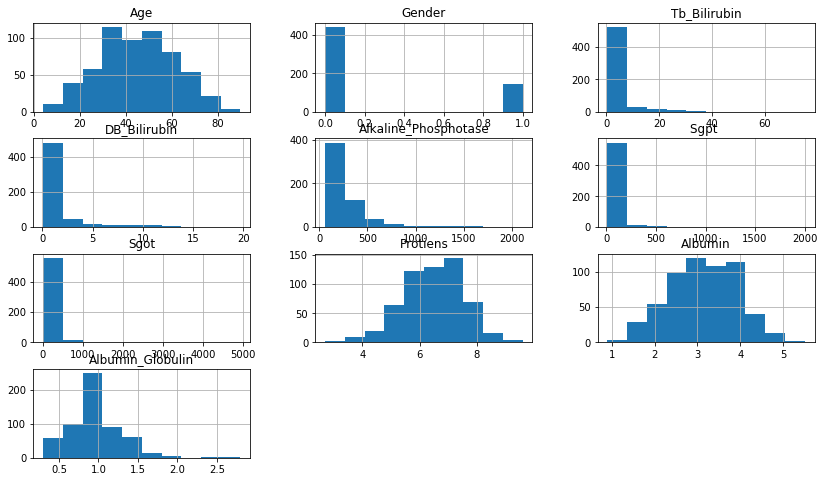

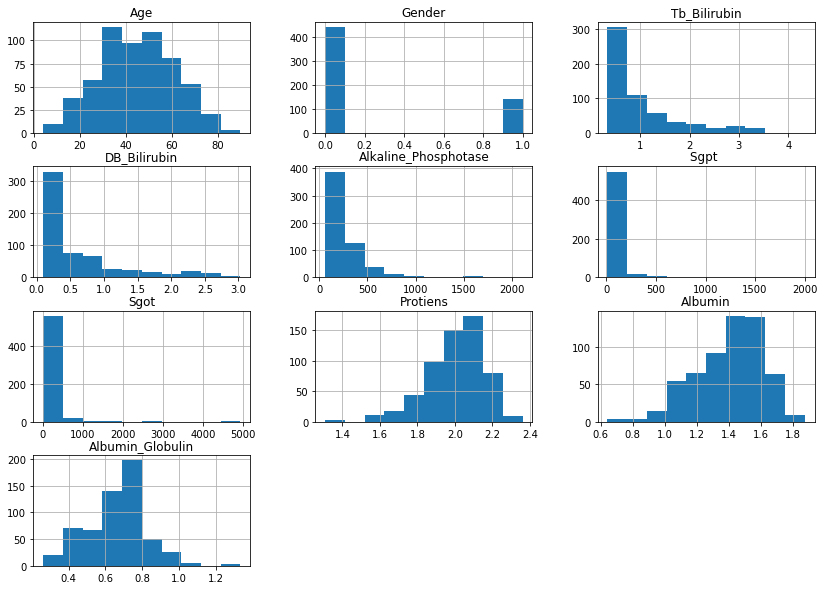

In [624]:
#Create Input && output data 
X_data = csv.drop('Disease',axis=1)
Y_data = csv['Disease']

# Visualize skewed continuous features of original data

X_data.hist(figsize=(14,8))


# Skewed features are Albumin, Direct Bilirubin, A/G ratio, Tota Bilirubin, Total Protein 
#Log-transform the skewed features
skewed = ['Albumin', 'DB_Bilirubin', 'Tb_Bilirubin', 'Albumin_Globulin', 'Protiens']
X_data[skewed] = X_data[skewed].apply(lambda x: np.log(x + 1))
X_data[skewed] = X_data[skewed]
# Visualize the new log distributions
X_data.hist(figsize=(14,10))

In [625]:
# : One-hot encode the data using pandas.get_dummies()
features = pd.get_dummies(X_data)

encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))
print (encoded)

disease=pd.get_dummies(Y_data)
encoded = list(disease.columns)
print ("{} disease columns after one-hot encoding.".format(len(encoded)))
#print disease[1]


10 total features after one-hot encoding.
['Age', 'Gender', 'Tb_Bilirubin', 'DB_Bilirubin', 'Alkaline_Phosphotase', 'Sgpt ', 'Sgot', 'Protiens', 'Albumin', 'Albumin_Globulin']
2 disease columns after one-hot encoding.


In [626]:
#split data
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test =train_test_split(X_data,Y_data , train_size =0.8)

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(466, 10) (117, 10) (466,) (117,)


In [627]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras


def preprocessing(X_data,type="MinMax"):

            #NORMALIZATION#
    if type == "Normalization":
        X_data_normalized = tf.keras.utils.normalize(X_data)
        return X_data_normalized

            #NORM-WITH MINMAX#
    elif type == "MinMax":
        scaler = MinMaxScaler(feature_range=(-1, 1))
        X_data_minmax  = scaler.fit_transform(X_data)
        return X_data_minmax 

X_data_minmax=preprocessing(X_data,type="MinMax")
print(X_data_minmax.shape)


(583, 10)


In [628]:
#Function to perform 5 Folds Cross-Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)


def cross_validation(model, _X, _y, _cv=kfold):
      '''
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=kfold,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [629]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [631]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate


gnb = GaussianNB()
    
    
    #MODEL for cross-entropy

gnb = GaussianNB()

decision_tree_result = cross_validation(gnb, X_data_minmax, Y_data, 5)
decision_tree_result
#MEAN 
x =  cross_validation(gnb, X_data_minmax, Y_data, 5)
Training_acc=x["Mean Training Accuracy"]
Validation_Acc=x["Mean Validation Accuracy"]
print(Training_acc,Validation_Acc)


59.306871547913346 60.389036251105225


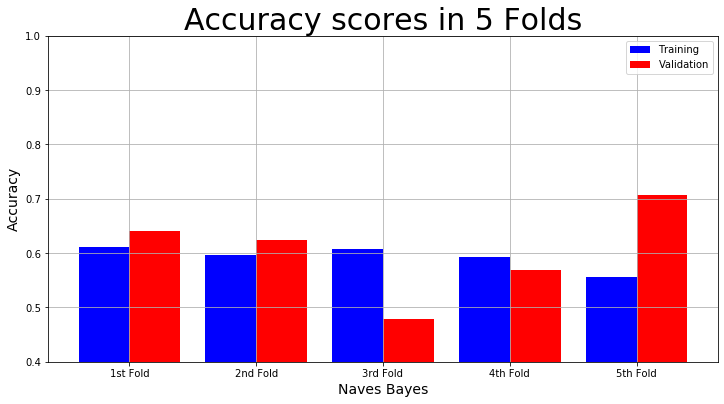

TRAINING ACCURACY :59.306871547913346 VALIDATION ACCURACY :60.389036251105225


In [635]:
model_name = "Naves Bayes"

plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

x =  cross_validation(gnb, X_data_minmax, Y_data, 5)
Training_acc=x["Mean Training Accuracy"]
Validation_Acc=x["Mean Validation Accuracy"]
print(f'TRAINING ACCURACY :{Training_acc}',f'VALIDATION ACCURACY :{Validation_Acc}')